# Problem statement

To meet the challenge of the increasing types of disease in this modern era, technology plays a very importantrole in health research. Women's health has become a major concern because of the increasing rates of cervicalcancer because it can be a deadly disease. The cervical tumor is one of the far-reaching sicknesses amongladies in India and around the world. Early analysis is good for better treatment, yet due to vulnerability indetecting cancer cells becoming complex.
Machine Learning (ML) systems can be used to create tools for doctors in the conclusion of cervical growth,which will enormously upgrade the survival rate of patients. Use the classification Machine Learning models to predict cervical growth and look at the execution of the two ML classifiers in terms of accuracy and other falserate measures.
Find the accuracy in classifying cervical cancer data on four different types of methods.

# Objective

1. Explore data by Exploratory data analysis.
2. Build a machine learning model to predict cervical growth.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno

In [109]:
#Reading data
data=pd.read_csv('cervical_cancer.csv')
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

# Data preprocessing

##### Missing values

In [111]:
data=data.replace('?',np.nan)

In [112]:
data.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<AxesSubplot:>

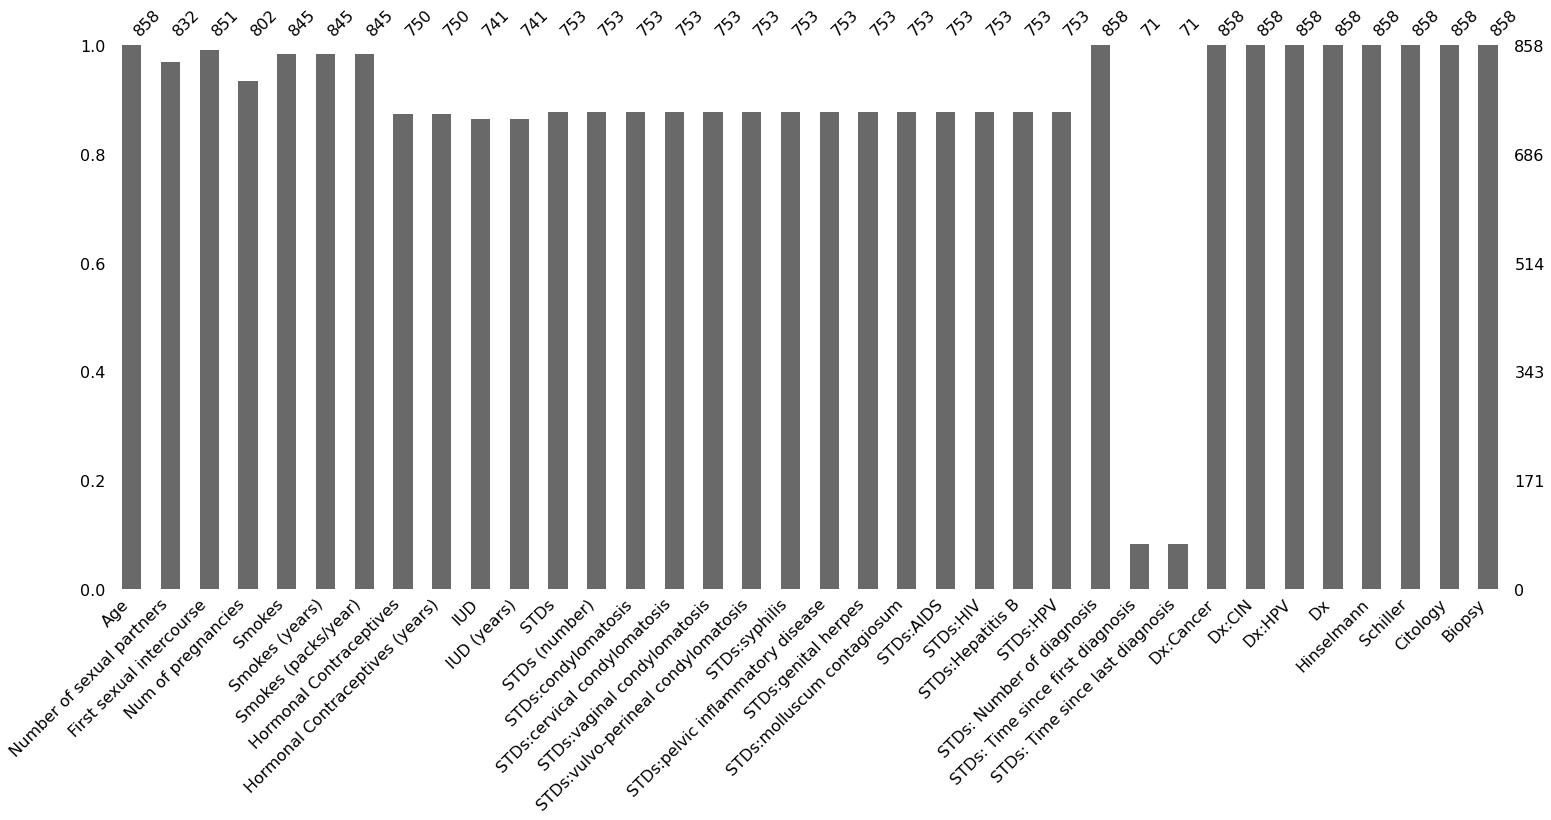

In [113]:
msno.bar(data)

In [114]:
columns=data.columns

for i in columns:
    data[i]=pd.to_numeric(data[i])

In [115]:
col_con=['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs: Time since first diagnosis','STDs: Time since last diagnosis']

for col in col_con:
    data[col] = data[col].replace(np.nan, data[col].mean())

In [116]:
col_cat=['Smokes','Hormonal Contraceptives','IUD','STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis',
        'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
        'STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV']


for col in col_cat:
    data[col]=data.apply(lambda x: x.fillna(x.value_counts().index[0]))

# EDA

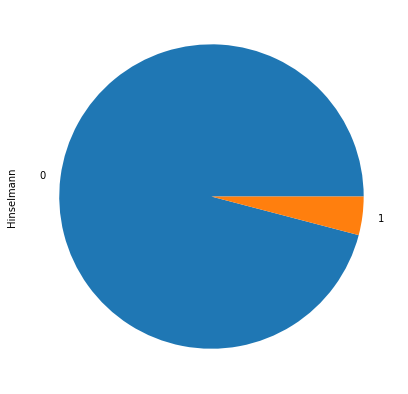

In [117]:
plt.figure(figsize=(7,7))
data["Hinselmann"].value_counts().plot.pie()
plt.show()

<AxesSubplot:xlabel='Smokes', ylabel='Count'>

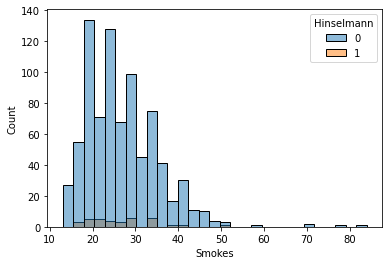

In [120]:
sb.histplot(x='Smokes',hue='Hinselmann',data=data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

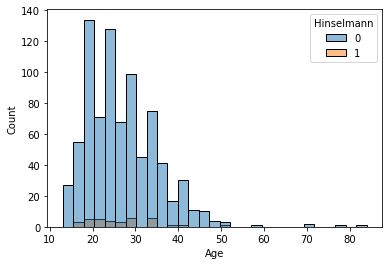

In [92]:
sb.histplot(x='Age',hue='Hinselmann',data=data)

<AxesSubplot:xlabel='First sexual intercourse', ylabel='Count'>

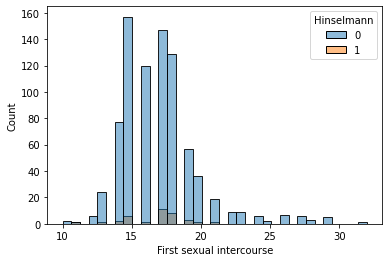

In [94]:
sb.histplot(x='First sexual intercourse',hue='Hinselmann',data=data)

<AxesSubplot:xlabel='Num of pregnancies', ylabel='Count'>

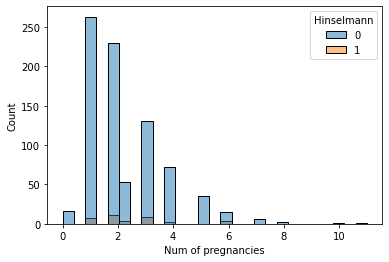

In [95]:
sb.histplot(x='Num of pregnancies',hue='Hinselmann',data=data)

<AxesSubplot:xlabel='Hormonal Contraceptives', ylabel='Count'>

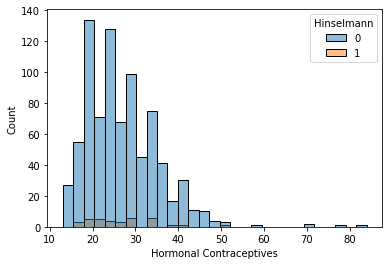

In [99]:
sb.histplot(x='Hormonal Contraceptives',hue='Hinselmann',data=data)

<AxesSubplot:xlabel='IUD', ylabel='Count'>

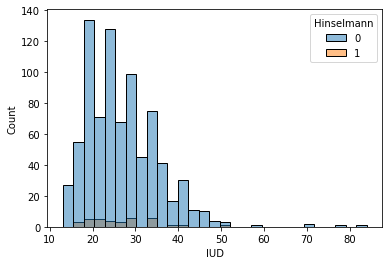

In [100]:
sb.histplot(x='IUD',hue='Hinselmann',data=data)

<AxesSubplot:xlabel='STDs', ylabel='Count'>

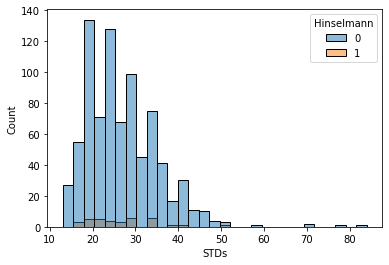

In [102]:
sb.histplot(x='STDs',hue='Hinselmann',data=data)

In [93]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

##### Removing skewness

In [10]:
from scipy.stats import skew
for col in col_con:
    print(col)
    print(skew(data[col]))

Number of sexual partners
5.529230265232778
First sexual intercourse
1.5680252782713986
Num of pregnancies
1.4696188951022893
Smokes (years)
4.49171108845331
Smokes (packs/year)
9.36347970054122
Hormonal Contraceptives (years)
2.8035620475214973
IUD (years)
5.371266923615221
STDs: Time since first diagnosis
4.512191794163808
STDs: Time since last diagnosis
4.801481036082847


In [11]:
def log_transform(sample_data):
    return np.log(sample_data+1)

In [12]:
for col_pos in col_con:
    data[col_pos] = data[col_pos].map(log_transform)

# Model building

#### Target variable : Hinselmann

##### Dividing data into input and output variables

In [17]:
x=data.drop(columns=['Hinselmann','Schiller','Citology','Biopsy'])
y=data['Hinselmann']

##### SMOTE to oversample imbalanced data

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    823
1    823
Name: Hinselmann, dtype: int64

##### Dividing data into train and test

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2)

##### Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression as LogReg
logreg=LogReg()

logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
test_predict = logreg.predict(x_test)

In [39]:
from sklearn.metrics import f1_score
k = f1_score(test_predict, y_test)
print('Training f1_score', k )

Training f1_score 0.6492537313432836


#### XGB classifier

In [26]:
import xgboost as xgb

In [27]:
model=xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=6,estimators=500)

In [28]:
model.fit(x_train,y_train)

[08:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              estimators=500, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_pred=model.predict(x_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9848484848484849


#### Target variable : Schiller

##### Dividing data into input and output variables

In [43]:
x=data.drop(columns=['Hinselmann','Schiller','Citology','Biopsy'])
y=data['Schiller']

##### SMOTE to oversample imbalanced data

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    784
1    784
Name: Schiller, dtype: int64

##### Dividing data into train and test

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2)

In [51]:
from sklearn.linear_model import LogisticRegression as LogReg
logreg=LogReg()

logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
test_predict = logreg.predict(x_test)

In [55]:
from sklearn.metrics import f1_score
k = f1_score(test_predict, y_test)
print('Training f1_score', k )

Training f1_score 0.65


##### XGB

In [56]:
model=xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=6,estimators=500)

In [57]:
model.fit(x_train,y_train)

[08:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              estimators=500, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_pred=model.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.945859872611465


#### Target variable: Citology

##### Dividing data into input and output variables

In [60]:
x=data.drop(columns=['Hinselmann','Schiller','Citology','Biopsy'])
y=data['Citology']

##### SMOTE to oversample imbalanced data

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    814
1    814
Name: Citology, dtype: int64

##### Splitting dataset into train and test

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2)

#### Logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression as LogReg
logreg=LogReg()

logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
test_predict = logreg.predict(x_test)

In [65]:
from sklearn.metrics import f1_score
k = f1_score(test_predict, y_test)
print('Training f1_score', k )

Training f1_score 0.7725631768953068


#### XGB

In [66]:
model=xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=6,estimators=500)

In [67]:
model.fit(x_train,y_train)

[08:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              estimators=500, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y_pred=model.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9601226993865031


#### Target variable: Biopsy

##### Dividing data into input and output variables

In [70]:
x=data.drop(columns=['Hinselmann','Schiller','Citology','Biopsy'])
y=data['Biopsy']

##### SMOTE to oversample imbalanced data

In [71]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    803
1    803
Name: Biopsy, dtype: int64

##### Splitting dataset into train and test

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2)

#### Logistic regression

In [73]:
from sklearn.linear_model import LogisticRegression as LogReg
logreg=LogReg()

logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
test_predict = logreg.predict(x_test)

In [75]:
from sklearn.metrics import f1_score
k = f1_score(test_predict, y_test)
print('Training f1_score', k )

Training f1_score 0.6787003610108302


#### XGB

In [76]:
model=xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=6,estimators=500)

In [77]:
model.fit(x_train,y_train)

[08:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              estimators=500, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred=model.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9720496894409938


# Insights

### EDA

1. Maximum number of patients belonging to age group 20 to 40 years are smokers for whom cervical cancer risk is high.
2. Patients with number of pregnancies between 2 to 4 are facing cervical cancer risk.
3. Patients who are having hormonal contraceptives at age 20 to 30 are having cervical cancer risk.
4. Patients who are having IUD between age 20 to 40 are having cervical cancer risk.
5. Patients who are having STDs between age 20 to 40 are having cervical cancer risk.

### Model

1. Hinselmann : Logistic regression is classifying cervical cancer risk with 64% accuracy whereas XG boost classifier classifying cervical cancer risk with 98% accuracy.
2. Schiller : Logistic regression is classifying cervical cancer risk with 65% accuracy whereas XG boost classifier classifying cervical cancer risk with 94% accuracy.
3. Citology : Logistic regression is classifying cervical cancer risk with 77% accuracy whereas XG boost classifier classifying cervical cancer risk with 96% accuracy.
3. Biopsy : Logistic regression is classifying cervical cancer risk with 67% accuracy whereas XG boost classifier classifying cervical cancer risk with 97% accuracy.

From above it can be concluded that XG boost is classifying cervical cancer risk with maximum accuracy.